<a href="https://colab.research.google.com/github/srinivasbhootam/weight-prediction-regression/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Weight with Linear Regression

## Introduction

In this analysis, we set out to predict a person’s weight using just height, age, and daily active minutes. We began by exploring the data to understand how these variables relate to weight and then cleaned the dataset to remove any missing values. Next, we trained a simple linear regression model and evaluated its performance with mean squared error, which came out to 472. This result shows that height, age, and activity level alone do not fully explain differences in weight. Our work highlights the need for additional information such as body composition or dietary habits to make more accurate predictions.


## Steps

We’ll build a Linear Regression model to predict **Weight** using **Height**, **Age**, and **Active Minutes** from the Fitness & Health Tracking dataset.

**Steps**  
Mount Google Drive  
Load & preprocess data  
EDA
Train Linear Regression  
Evaluate with Mean Squared Error (MSE)  


In [6]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Imports


In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


## 3. Load the Dataset



In [8]:
file_path = '/content/drive/MyDrive/Colab Notebooks/datasets/Fitness_Health_Tracking_Dataset_with_Missing_Values.xlsx'
df = pd.read_excel(file_path)
df.head()


,User_ID,Full Name,Date,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood
0,1,Sara Martinez,2023-01-01,19,Female,191,80,11405,1862,7.021201,3.440508,80.0,84.0,Yoga,2,Happy
1,1,Sara Martinez,2023-01-02,19,Female,191,80,7010,1806,NaN,3.103590,47.0,72.0,Cardio,9,Neutral
2,1,Sara Martinez,2023-01-03,19,Female,191,80,18942,2274,8.167817,3.814843,46.0,85.0,Yoga,6,Sad
3,1,Sara Martinez,2023-01-04,19,Female,191,80,13778,2656,7.453552,3.508636,105.0,77.0,Yoga,2,Sad
4,1,Sara Martinez,2023-01-05,19,Female,191,80,10247,3571,5.132654,NaN,53.0,61.0,Yoga,8,Sad


## 4. Preprocessing

1. Inspect current column names  
2. Rename to match our desired features  
3. Check for missing values in those columns  
4. Drop rows missing any of our target/features  
5. Select `Height`, `Age`, `Active Minutes` as X and `Weight` as y  


In [11]:
# 4.1 Inspect current column names
print("Before rename:", df.columns.tolist())

# 4.2 Rename columns to match our code
df.rename(columns={
    'Height (cm)':     'Height',
    'Weight (kg)':     'Weight',
    'Active_Minutes':  'Active Minutes'
}, inplace=True)

print("After rename:", df.columns.tolist())

# 4.3 Check missing values in our key columns
print(df[['Age','Height','Weight','Active Minutes']].isna().sum())

# 4.4 Drop rows missing in any of those columns
df_clean = df.dropna(subset=['Age','Height','Weight','Active Minutes']).reset_index(drop=True)

# 4.5 Split out features and target
X = df_clean[['Height','Age','Active Minutes']]
y = df_clean['Weight']

# Quick sanity‐check
print(X.head())
print(y.head())


Before rename: ['User_ID', 'Full Name', 'Date', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Steps_Taken', 'Calories_Burned', 'Hours_Slept', 'Water_Intake (Liters)', 'Active_Minutes', 'Heart_Rate (bpm)', 'Workout_Type', 'Stress_Level (1-10)', 'Mood']
After rename: ['User_ID', 'Full Name', 'Date', 'Age', 'Gender', 'Height', 'Weight', 'Steps_Taken', 'Calories_Burned', 'Hours_Slept', 'Water_Intake (Liters)', 'Active Minutes', 'Heart_Rate (bpm)', 'Workout_Type', 'Stress_Level (1-10)', 'Mood']
Age                  0
Height               0
Weight               0
Active Minutes    1867
dtype: int64
   Height  Age  Active Minutes
0     191   19            80.0
1     191   19            47.0
2     191   19            46.0
3     191   19           105.0
4     191   19            53.0
0    80
1    80
2    80
3    80
4    80
Name: Weight, dtype: int64


## 4. Exploratory Data Analysis (EDA)

We’ll take a quick look at the distributions and relationships between our key variables:
- `Age`  
- `Height`  
- `Weight`  
- `Active Minutes`


                Age        Height        Weight  Active Minutes
count  34633.000000  34633.000000  34633.000000    34633.000000
mean      43.165160    172.681691     85.828863       74.372477
std       13.671609     14.433822     21.558755       26.012433
min       19.000000    150.000000     51.000000       30.000000
25%       29.000000    160.000000     68.000000       52.000000
50%       44.000000    173.000000     86.000000       74.000000
75%       57.000000    181.000000    107.000000       97.000000
max       63.000000    199.000000    118.000000      119.000000


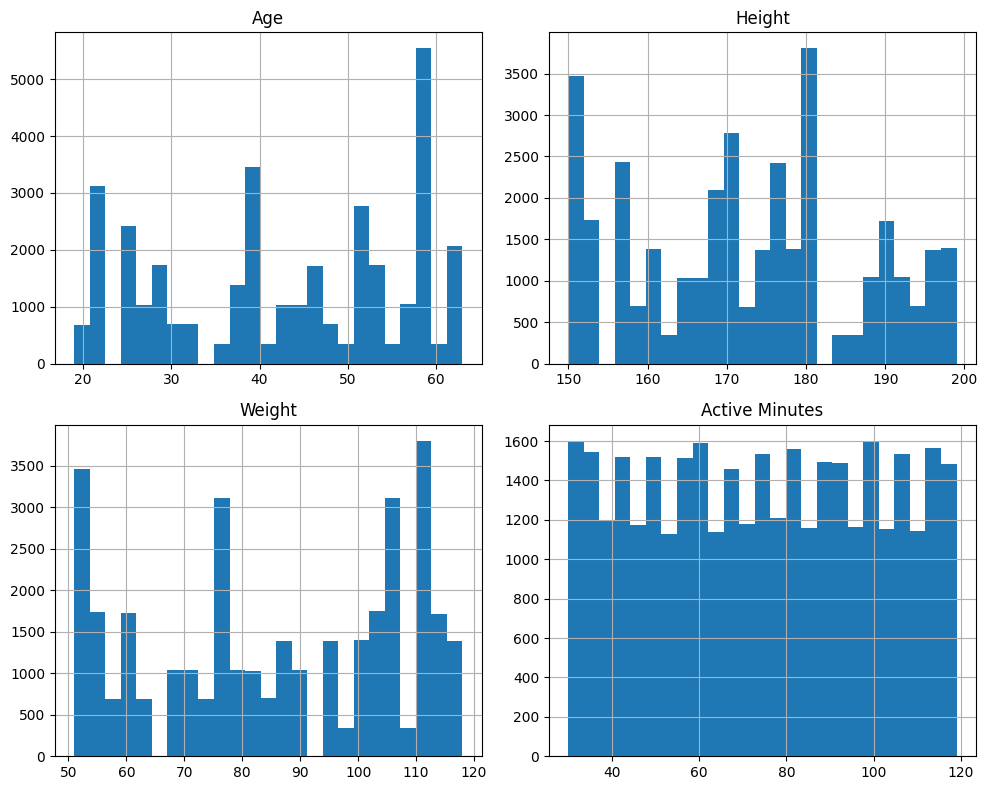

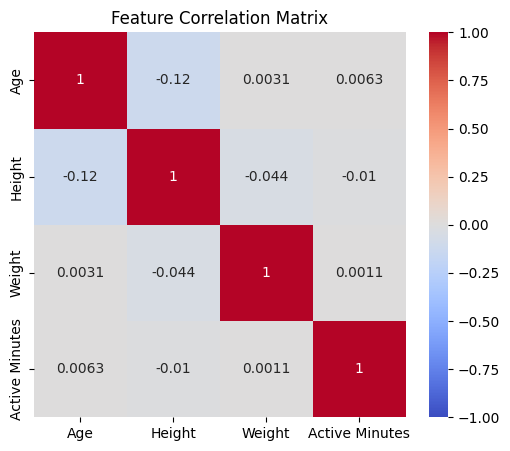

In [12]:
# 4.1 Quick summary statistics
print(df_clean[['Age','Height','Weight','Active Minutes']].describe())

# 4.2 Histograms for each feature
import matplotlib.pyplot as plt

df_clean[['Age','Height','Weight','Active Minutes']].hist(bins=25, figsize=(10, 8))
plt.tight_layout()
plt.show()

# 4.3 Correlation heatmap
import seaborn as sns

plt.figure(figsize=(6,5))
corr = df_clean[['Age','Height','Weight','Active Minutes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()


## 5. Train/Test Split

Split the data into an 80% training set and a 20% test set, using a fixed random seed for reproducibility.


In [13]:
from sklearn.model_selection import train_test_split

# 5.1 Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 5.2 Sanity check shapes
print("X_train shape:", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape: (27706, 3)
X_test shape:  (6927, 3)
y_train shape: (27706,)
y_test shape:  (6927,)


## 6. Model Training

Instantiate and fit a Linear Regression model on the training data.


In [14]:
from sklearn.linear_model import LinearRegression

# 6.1 Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 6.2 Inspect learned coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coeff_df)


          Feature  Coefficient
0          Height    -0.064513
1             Age    -0.011134
2  Active Minutes    -0.004645


## 7. Evaluation

1. Predict on the test set  
2. Compute Mean Squared Error (MSE)  
3. Visualize true vs. predicted weights  


Mean Squared Error: 472.03


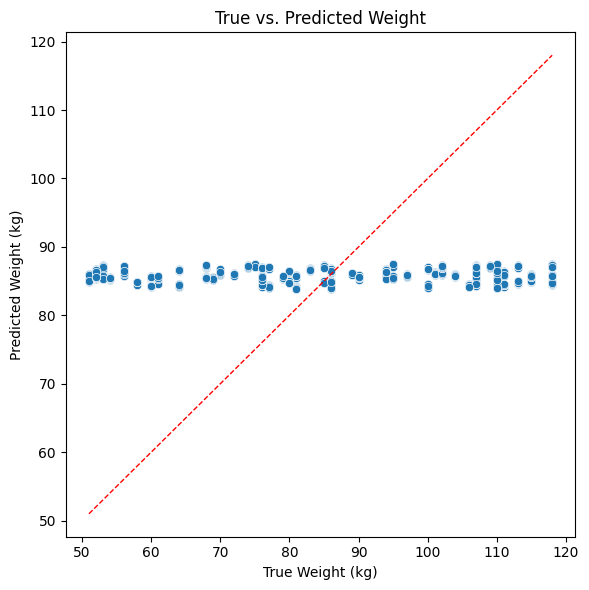

In [15]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 7.1 Make predictions
y_pred = model.predict(X_test)

# 7.2 Compute MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# 7.3 Scatter plot: true vs. predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    linewidth=1
)
plt.xlabel('True Weight (kg)')
plt.ylabel('Predicted Weight (kg)')
plt.title('True vs. Predicted Weight')
plt.tight_layout()
plt.show()


## 8. Conclusion

- **Mean Squared Error (MSE):** 472.03  
- The model’s predictions tend to cluster around the mean weight (~85 kg), reflecting that **Height**, **Age**, and **Active Minutes** alone explain only a small portion of the variation in weight (as we saw in the near-zero correlations).  
- **Next steps:**  
  - Engineer additional features (e.g., BMI, diet/nutrition data, body composition metrics)  
  - Try regularized linear models (Ridge, Lasso) or non-linear algorithms (Random Forest, Gradient Boosting)  
  - Perform cross-validation and hyperparameter tuning to improve generalization  


## Interpretation
I got the value of Mean Squared Error as 472.03, With an MSE of 472, our weight predictions tend to be quite far from the actual values. In other words, height, age, and daily active minutes by themselves don’t capture all the factors that determine someone’s weight. You can see in the scatter plot that most predictions hover around the average instead of matching each person’s true weight. To improve accuracy, we would need richer information, such as body composition or dietary habits and potentially more flexible models or regularization techniques.

